# Learning Objectives
- Explore vectorized word representations
- Learn to use word representations as features for text classification

# Setup
Please run the cells below before starting the exercises.

In [1]:
!pip install datasets >> dev.null

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/zhejing/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install -U gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 6.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-4.2.0-cp39-cp39-macosx_11_0_arm64.whl size=23933049 sha256=c36248461cc95af26428edf62a1b1915b2ae560feebfa51c8520cce89e97a717
  Stored in directory: /Users/zhejing/Library/Caches/pip/wheels/ed/5e/79/d2997e72ba8900a820dd5870a3566779e52ee8279f71b4c799
Successfully built gensim


In [5]:
import gensim.downloader as api

print("Downloading GloVe embeddings. Please note this may take a few minutes.")
glove = api.load('glove-wiki-gigaword-300')
print("Finished downloading GloVe")

[=======================---------------------------] 47.5% 178.5/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.1% 210.8/376.1MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 376.1/376.1MB downloaded
Finished downloading GloVe


# Word Embeddings

In this section we will explore the concept of **embeddings**, which are vector representations of words. Sometimes this term is more strictly applied only to dense vectors like **word2vec**, rather than sparse **TF-IDF** or **PPMI** *(positive pointwise mutual information)* vectors. The word “embedding” derives from its mathematical sense as a mapping from one space or structure to another.

As you recall, computers cannot directly understand language. We need to represent language, which is discrete and symbolic, as numeric values to the machine. In previous labs we've done this by using **bag-of-words** and **TF-IDF**. A limitation to those approaches is that they don't encode any sort of meaning. 

Modern word-level representations use fixed dimension arrays of floating point values to represent words. These word embeddings can be generated using a variety of techniques (see below). To learn more about word embeddings check out **Chapter 6** in ["Speech and Language Processing"](https://web.stanford.edu/~jurafsky/slp3/ed3book.pdf ) and the following blogposts:

1. https://jalammar.github.io/illustrated-word2vec/
2. https://ruder.io/word-embeddings-1/ (+ the following parts)


## Word2Vec

One of the most popular embedding models is **word2vec**, proposed by Mikolov et al. in 2013 in the following papers:

* [Efficient Estimation of Word Representations in Vector Space](https://arxiv.org/pdf/1301.3781.pdf)
* [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

As word embeddings are a key building block of deep learning models for NLP, word2vec is often assumed to belong to the same group. Technically however, word2vec is not a part of deep learning, as its architecture is neither deep nor uses non-linearities.

Essentially, word2vec is an umbrella term for two architechtures: *Skip-Gram* and *Continuous Bag-Of-Words (CBOW)*.  

- **CBOW** predicts a word by its context;
- **Skip-gram** predicts the context of a given word.

![](https://machinelearningmastery.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png)


## GloVe

**GloVe** is very similar to word2vec, but it starts off with buildings a co-occurence matrix, which makes it a *hybrid* model. 

It takes globacl context into considerations instead of like word2vec, which takes only local / neighbour context.

> GloVe is based on ratios of probabilities from the word-word co-occurrence matrix, combining the intuitions of count-based models while also capturing the linear structures used by methods like word2vec
*(Pennington et al. 2014)*

[Here](https://www.quora.com/How-is-GloVe-different-from-word2vec) and [here](https://becominghuman.ai/mathematical-introduction-to-glove-word-embedding-60f24154e54c) are good explanations of the differences between word2vec and GloVe in more detail. 

The GloVe embedding model was proposed by the Stanford NLP group in 2014. Here is the article and the website for the project.

* [GloVe: Global Vectors forWord Representation](https://nlp.stanford.edu/pubs/glove.pdf)
* [GloVe website](https://nlp.stanford.edu/projects/glove/) 

## FastText

**FastText** is an embedding model proposed by Facebook in 2017.  The major difference from word2vec and GloVe is that FastText represents every word in a corpus as a set of character N-grams. For example, if `n=3`, then a vector for the word `"where"` will be a sum of the vectors for character trigrams `"<wh", "whe", "her", "ere", "re>"` (where "<" and ">" are the start and end symbols). It allows us to get vectors for OOV-words and effectively work with texts that contain typos and spelling mistakes.

* [Enriching Word Vectors with Subword Information](https://aclweb.org/anthology/Q17-1010) (paper)
* [FastText website](https://fasttext.cc/)
* [Tutorial](https://fasttext.cc/docs/en/support.html)
* [Multilingual model](https://fasttext.cc/docs/en/crawl-vectors.html) (157 languages)
* [Models pre-trained on Wikipedia](https://fasttext.cc/docs/en/pretrained-vectors.html) (294 languages separately)
* [GitHub repo](https://github.com/facebookresearch/fasttext)

There is a Python library `fasttext`, but you can use `gensim` to work with pre-trained models and train your own ones as well.

## BPE

BPEmb is a collection of pre-trained subword embeddings in 275 languages, based on **Byte-Pair Encoding (BPE)** and trained on Wikipedia. It was developed in 2018 by Benjamin Heinzerling and Michael Strube.

* [Paper №1](https://arxiv.org/pdf/1508.07909.pdf) 
* [Paper №2](https://aclweb.org/anthology/L18-1473)
* [Website](https://nlp.h-its.org/bpemb/)
* [GitHub repo](https://github.com/bheinzerling/bpemb) for `bpemb` Python library

This model uses subword information in a different way than FastText. For example, we'd like to encode the string `aaabdaaabac`. The combination `aa` is the most frequent in it, so we can combine these two characters and consider them a character of its own. This operation is performed iteratively.

![](https://bpemb.h-its.org/en/en.wiki.bpe.emb.vs3000.d200.png)


# Exploring GloVe

For the first set of exercises, we will be exploring GloVe embeddings. We have preloaded a pretrained model in `glove` variable and will be using the `gensim` library to work with it.

So let's start off with what exactly a word embedding is. In the cell below we look at the GloVe representation of the word "king". 

A word representation is an array of float values. In the case of GloVe it has 300 values also reffered to as having 300 dimensions.

In [6]:
print(type(glove["king"]))
print(f"shape: {glove['king'].shape}")
print(glove["king"])

<class 'numpy.ndarray'>
shape: (300,)
[ 0.0033901 -0.34614    0.28144    0.48382    0.59469    0.012965
  0.53982    0.48233    0.21463   -1.0249    -0.34788   -0.79001
 -0.15084    0.61374    0.042811   0.19323    0.25462    0.32528
  0.05698    0.063253  -0.49439    0.47337   -0.16761    0.045594
  0.30451   -0.35416   -0.34583   -0.20118    0.25511    0.091111
  0.014651  -0.017541  -0.23854    0.48215   -0.9145    -0.36235
  0.34736    0.028639  -0.027065  -0.036481  -0.067391  -0.23452
 -0.13772    0.33951    0.13415   -0.1342     0.47856   -0.1842
  0.10705   -0.45834   -0.36085   -0.22595    0.32881   -0.13643
  0.23128    0.34269    0.42344    0.47057    0.479      0.074639
  0.3344     0.10714   -0.13289    0.58734    0.38616   -0.52238
 -0.22028   -0.072322   0.32269    0.44226   -0.037382   0.18324
  0.058082   0.26938    0.36202    0.13983    0.016815  -0.34426
  0.4827     0.2108     0.75618   -0.13092   -0.025741   0.43391
  0.33893   -0.16438    0.26817    0.68774    0.3

What makes word embeddings powerful is their relationship to each other in higher dimensional space. Words that are similiar to each other will be closer to each other. `Gensim` has a function called `most_similiar` which returns words that are most similiar to a given word in the embedding space. Let's try it out. 

In [7]:
glove.most_similar("bank")

[('banks', 0.7039024829864502),
 ('banking', 0.6014178395271301),
 ('central', 0.5375901460647583),
 ('credit', 0.5313779711723328),
 ('bankers', 0.5164543390274048),
 ('financial', 0.49996113777160645),
 ('investment', 0.4982146620750427),
 ('lending', 0.4970785081386566),
 ('citibank', 0.4939170777797699),
 ('monetary', 0.4813266098499298)]

## Exercise 1

Find the most similiar word to the word "account". Do all these words make sense? Are there any suprising words in the list? Why do think they are there?


In [8]:
# YOUR CODE HERE
glove.most_similar("account")

#detailed
#instance
#fact
#according

#hugely depends on the corpus.

[('accounts', 0.8495128154754639),
 ('personal', 0.49062103033065796),
 ('savings', 0.48705780506134033),
 ('own', 0.47240906953811646),
 ('income', 0.47038543224334717),
 ('detailed', 0.46782127022743225),
 ('instance', 0.46126681566238403),
 ('fact', 0.4611614942550659),
 ('according', 0.46037551760673523),
 ('amount', 0.4574888348579407)]

## Vector Similarity

There are several different ways to measure how similar two word embeddings are to each other. The most common way is to use **cosine similarity** which uses angular distance between the two vectors as a measure of similarity. Cosine scores range from -1 (orthagonal) to 1 (identical). In practice cosine scores of $0.7$ and higher tend to indicate some degree of similarity between the two embeddings. Let's explore this with a simple implementation of cosinse similarity.

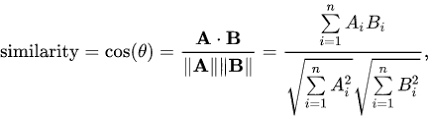

In [9]:
# Cosine Similarity Function
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vector1, vector2):
  """ Given two vectors return the cosine similarity """
  # dot product of vector1 and vector2
  numerator = np.dot(vector1, vector2) 
  # the product of the normed vectors
  denominator = np.linalg.norm(vector1) * np.linalg.norm(vector2) 
  return round(numerator / denominator, 4)

wv1 = glove["bank"]
wv2 = glove["banking"]
wv3 = glove["dog"]

print("A cosine score 1 indicate that the two vectors are identical")
print(cosine_similarity(wv1, wv1))

print("Higher cosine score indicate that the two vectors are similiar")
print(cosine_similarity(wv1, wv2))

print("Lower cosine scores indicate that the two vectors are dissimilar")
print(cosine_similarity(wv1, wv3))


A cosine score 1 indicate that the two vectors are identical
1.0
Higher cosine score indicate that the two vectors are similiar
0.6014
Lower cosine scores indicate that the two vectors are dissimilar
-0.0387


## Exercise 2
Rank the following words in terms of their similarity or related-ness to the word "dog" based on your intuition.

- boat
- puppy
- terrier
- house
- cat


Now, in the code cell below, rank them based on the cosine similarity with the word "dog". Do you find the results surprising?


In [21]:
# YOUR CODE HERE
dog = glove["dog"]
nouns = {}
nouns['puppy'] = glove["puppy"]
nouns['terrier'] = glove["terrier"]
nouns['cat'] = glove["cat"]
nouns['house'] = glove["house"]
nouns['boat'] = glove["boat"]

cs = {}

for k in nouns:
    cs[k] = cosine_similarity(dog, nouns[k])

dict(sorted(cs.items(), key=lambda item: item[1], reverse=True))

{'cat': 0.6817,
 'puppy': 0.5936,
 'terrier': 0.4289,
 'house': 0.2871,
 'boat': 0.2361}

## Analogies with Word Embeddings
A really cool feature of word embeddings is that since these are vectors you can perform mathematical operations such as addition and substraction on them and get interesting results. The most famous example of this being:
`king` + `woman` - `man` = `queen`. 

You can think of this as an analogy where in the form of: *king is to man as woman is to X*. In `gensim`, we can pass positive and negative words to the `most_similar` function (see below). The word embeddings in the positive list are added together and words embeddings in the negative list are subtracted. For example `king + woman - man` would be expressed as `most_similar(positive=['king', 'woman'], negative=['man'])`

In [41]:
glove.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624220848083),
 ('throne', 0.5386105179786682),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.4980250597000122),
 ('mother', 0.4956442713737488),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668240249156952),
 ('wife', 0.46473270654678345)]

## Exercise 3
Try playing around with this and seeing if you can find an interesting analogy.

In [73]:
# YOUR CODE HERE
glove.most_similar(positive=["kids", "woman"], negative=["man"])

#bias here as kids to woman is children while to man is something else.

[('children', 0.6878494024276733),
 ('girls', 0.6588815450668335),
 ('parents', 0.6434296369552612),
 ('mothers', 0.608021080493927),
 ('teens', 0.5940178036689758),
 ('mom', 0.5893314480781555),
 ('teenagers', 0.5759006142616272),
 ('toddlers', 0.5602193474769592),
 ('child', 0.5592862963676453),
 ('babies', 0.555264413356781)]

# Using Word Embeddings as Features
In this section we'll look at how word embeddings can be used as features for NLP tasks like classification. 

Let's solve the task of *intent classification*, which consists in mapping a user utterance to a set of intents. For example, *\"what is my banking balance\"* > *\"balance\"*. 

To use embeddings as features, we will need to do the following:
1. Tokenize the input
2. Extract word embeddings for each word (if available) in the input sentence from a pretrained GloVe model and mean pool them
4. Train and evaluate a classifier

## Classification Dataset

We will work with [CLINC150](https://huggingface.co/datasets/clinc_oos), a dataset for intent classification that contains out-of-scope queries that do not fall into any of the system's supported intents.

In [48]:
# Grab CLINC data and convert them into data frames
import urllib.request, json 
with urllib.request.urlopen("https://raw.githubusercontent.com/clinc/oos-eval/master/data/data_small.json") as url:
    data = json.loads(url.read().decode())

In [49]:
import pandas as pd 

train  = pd.DataFrame(data["train"], columns=["text", "intent"])
train["split"] = "train"

test   = pd.DataFrame(data["test"], columns=["text", "intent"])
test["split"] = "test"

print(f"Dataset split sizes: train - {len(train)} | test - {len(test)}")

# Combine datasets into single dataframe for easier use
dataset = pd.concat([train, test])

# What labels do we have?
dataset['intent'].unique()

Dataset split sizes: train - 7500 | test - 4500


array(['direct_deposit', 'carry_on', 'whisper_mode', 'text', 'recipe',
       'smart_home', 'who_do_you_work_for', 'rewards_balance',
       'restaurant_reservation', 'travel_notification', 'update_playlist',
       'change_volume', 'routing', 'mpg', 'bill_balance',
       'do_you_have_pets', 'cook_time', 'what_song', 'new_card',
       'todo_list_update', 'traffic', 'next_song', 'where_are_you_from',
       'tire_change', 'bill_due', 'greeting', 'taxes', 'lost_luggage',
       'change_accent', 'todo_list', 'last_maintenance', 'make_call',
       'gas_type', 'cancel_reservation', 'schedule_meeting', 'find_phone',
       'insurance_change', 'improve_credit_score', 'travel_suggestion',
       'roll_dice', 'repeat', 'play_music', 'are_you_a_bot',
       'sync_device', 'calendar', 'insurance', 'international_visa',
       'freeze_account', 'shopping_list', 'oil_change_when',
       'share_location', 'what_can_i_ask_you', 'plug_type', 'vaccines',
       'payday', 'application_status', 'next

In [50]:
dataset.head()

,text,intent,split
0,can you walk me through setting up direct depo...,direct_deposit,train
1,i want to switch to direct deposit,direct_deposit,train
2,set up direct deposit for me,direct_deposit,train
3,how do i go about setting up direct deposit,direct_deposit,train
4,i need to get my paycheck direct deposited to ...,direct_deposit,train


## Exercise 4.1 

Tokenize the input.  Your code should do the following:

1. Tokenize all the texts in the `text` column in `dataset` dataframe (i.e. `dataset["text"]`). 
2. Store this tokenized text in a new variable called `text_toks`.

**Hint:** You can tokenize using the native string split method or NLTK's `word_tokenize` method.

In [124]:
# YOUR CODE HERE
from nltk.tokenize import word_tokenize
# word_tokenize(dataset["text"].values)
text_toks = []

for text in dataset["text"].values:
    text_toks.append(word_tokenize(text))
    
len(text_toks)

12000

## Exercise 4.2

Next we extract the word embeddings for each word in the input. 
- Create a list called `all_text_vecs`. 
- Loop over the list of tokenized texts. Create a secondary list called `text_vecs`. For each word in the tokenized input, look up the word embedding in GloVe and add to the `text_vecs`. After you have looked up all the words, append `text_vecs` to `all_text_vecs`. 
- Sometimes we may not find an embedding in GloVe for a word. In this case, we add a randomly generated embedding to `text_vecs` representing out-of-vocabulary input. 

**Hint:** You can check if a word exists in GloVe using the `in` operator. For example: ```'bank' in glove``` will return `True` but ``` 'dfdss' in glove ``` will return `False`


In [130]:
import numpy as np

all_text_vecs = []
oov = np.random.rand(1,300) # random vector to represent out-of-vocab

# YOUR CODE HERE
for sublist in text_toks:
    text_vecs = []
    for tok in sublist:
        if tok in glove:
            text_vecs.append(glove[tok])  
        else:
            text_vecs.append(oov)

    all_text_vecs.append(text_vecs)
  
assert len(all_text_vecs) == len(text_toks)

## Exercise 4.3
There are different strategies for using embeddings as inputs to a model. One is to concatenate the vectors horizontally . For example, if you had 5 words in an input, where each word was represented by a 300 dimensional vector, your concatenated input would be $5 \times 300 = 1500$ dimensional vector. 

Machine learning models expect fixed dimenional inputs in the form of $N \times F$, where $N$ is the number of input rows, and $F$ is the number of features being provided to the model. The challenge in our case is that each input sentence is of variable length and we can't create fixed size matrix with that. There are ways to solve this, but it's out of scope for this exercise.

Another strategy is to reduce our input features by mean pooling. What this involves is vertically stacking our embeddings and take mean down the columns. So if our input is $5 \times 300$, we can reduce down to $1 \times 500$. Let's take a closer look at this using the `vstack` and `mean` features of the `numpy` library.

In [94]:
example_input1 = [glove["bank"], glove["account"], glove["open"], glove["today"], glove["please"]]
example_input2 = [glove["bank"], glove["account"]]

# Let stack this vertically and take a look at the shape
example1_vstack = np.vstack(example_input1)
example2_vstack = np.vstack(example_input2)
print("Example 1 shape", example1_vstack.shape)
print("Example 2 shape", example2_vstack.shape)

# What happens if we take the average across the columns 
print("Shape after mean pooling Example 1: ", np.mean(example1_vstack, axis=0).shape)
print("Shape after mean pooling Example 2: ", np.mean(example2_vstack, axis=0).shape)



Example 1 shape (5, 300)
Example 2 shape (2, 300)
Shape after mean pooling Example 1:  (300,)
Shape after mean pooling Example 2:  (300,)


It creates a single 300-dimensional vector that represents average of all the word embeddings. In the code below let's add in the mean pool operation for each set of word embedding inputs. We will update the `dataset` dataframe with the mean pooled embeddings.

1. Loop over each list of word embeddings per input
2. `vstack` and take the mean of the `tex_vecs`
3. Append the mean pooled vector to `all_pooled_vecs`
4. Update dataset with these pooled vectors

In [131]:
len(all_text_vecs)

12000

In [132]:
all_pooled_vecs = []

# YOUR CODE HERE
for sublist in all_text_vecs:
    vstack = np.vstack(sublist)
    pooled_vecs = np.mean(vstack, axis=0)
    all_pooled_vecs.append(pooled_vecs)

# 4. Update dataset with these pooled vectors
dataset["embeddings"] = all_pooled_vecs

print(f"Sanity check: {len(all_pooled_vecs) == len(all_text_vecs)}")
print(f"Sanity check: {np.vstack(all_pooled_vecs).shape[1] == 300}")

Sanity check: True
Sanity check: True


## Exercise 4.4
We have finally made it to model part. We've provided the model and evaluation code below. If step 4.1 - 4.3 were completed, the code below should run.

In [133]:
from sklearn.preprocessing import LabelEncoder

# Encode intent label and transform into enumerated values
le = LabelEncoder()
le.fit(dataset["intent"])

dataset["encoded_label"] = le.transform(dataset["intent"])

# break out the encoded labels by train / test split
y_train = dataset.query("split=='train'")["encoded_label"]  
y_test  = dataset.query("split=='test'")["encoded_label"]

X_train = np.vstack(dataset.query("split=='train'")["embeddings"])
X_test = np.vstack(dataset.query("split=='test'")["embeddings"])

print(f"Input shapes X_train: {X_train.shape}, X_text: {X_test.shape}")
print(f"Output shapes y_train: {y_train.shape}, y_text: {y_test.shape}")

Input shapes X_train: (7500, 300), X_text: (4500, 300)
Output shapes y_train: (7500,), y_text: (4500,)


In [134]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load model and fit to training data
clf = GaussianNB()
clf.fit(X_train, y_train)

# Generate predictions
preds = clf.predict(X_test)

# Calculate Accuracy metrics
acc = accuracy_score(y_test, preds)
print(f"Accuracy: {acc}")

Accuracy: 0.7471111111111111
